# Implementation of Multilayer Perceptron from Scratch

Now that we know how multilayer perceptrons (MLPs) work in theory, let’s implement them. First, we import the required
packages.

In [1]:
import sys
sys.path.insert(0, '..')
import d2l
from d2l.data import load_data_fashion_mnist
from d2l.train import train_ch3

import torch
import torch.nn as nn
import  numpy as np

To compare against the results we previously achieved with vanilla softmax regression, we continue to use the Fashion-
MNIST image classification dataset.

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# Initialize Model Parameters

Recall that this dataset contains 10 classes and that each image consists of a 28 × 28 = 784 grid of pixel values. Since
we’ll be discarding the spatial strucutre (for now), we can just think of this as a classifiation dataset with 784 input features
and 10 classes. In particular we will implement our MLP with one hidden layer and 256 hidden units. Note that we can
regard both of these choices as hyperparameters that could be set based on performance on validation data. Typically,
we’ll choose layer widths as powers of 2 to make everything align nicely in memory.

# Activation Function

To make sure we know how everything works, we will use the maximum function to implement ReLU ourselves, instead
of invoking nn.ReLU directly.

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.W1 = nn.Parameter(torch.randn(784,256,requires_grad=True)*0.01)
        self.b1 = nn.Parameter(torch.zeros(256,requires_grad=True))
        self.W2 = nn.Parameter(torch.randn(256,10,requires_grad=True)*0.01)
        self.b2 = nn.Parameter(torch.zeros(10,requires_grad=True))
        
    def forward(self, X):
        X = X.reshape((-1, 784))
        H=self.relu(X@self.W1 + self.b1)   # Here '@' stands for dot product operation
        return (H@self.W2 + self.b2)
    
    def relu(self, s):
        a=torch.zeros_like(s)
        return torch.max(s, a)

# The model

As in softmax regression, we will reshape each 2D image into a flat vector of length num_inputs. Finally, we cam
implement our model with just a few lines of code.

In [4]:
net=Net()

# The Loss Function

For better numerical stability and because we already know how to implement softmax regression completely from scratch
in Section 3.6, we will use torch’s integrated function for calculating the softmax and cross-entropy loss. Recall that we
discussed some of these intricacies in Section 4.1.

In [5]:
criterion = nn.CrossEntropyLoss()

# Training

Steps for training the MLP are no different than for softmax regression. In the d2l package, we directly call the
train_ch3 function. We set the number of epochs to 10 and the learning rate to 0.5.

In [6]:
num_epochs, lr = 10, 0.5
train_ch3(net, train_iter, test_iter, criterion, num_epochs, batch_size, lr)

epoch 1, loss 0.0031, train acc 0.703, test acc 0.700
epoch 2, loss 0.0019, train acc 0.817, test acc 0.787
epoch 3, loss 0.0017, train acc 0.844, test acc 0.842
epoch 4, loss 0.0015, train acc 0.856, test acc 0.773
epoch 5, loss 0.0014, train acc 0.863, test acc 0.783
epoch 6, loss 0.0014, train acc 0.870, test acc 0.826
epoch 7, loss 0.0013, train acc 0.876, test acc 0.861
epoch 8, loss 0.0013, train acc 0.881, test acc 0.851
epoch 9, loss 0.0012, train acc 0.885, test acc 0.833
epoch 10, loss 0.0012, train acc 0.886, test acc 0.782


To see how well we did, let’s apply the model to some test data. If you’re interested, compare the result to corresponding linear model in Section 3.6.

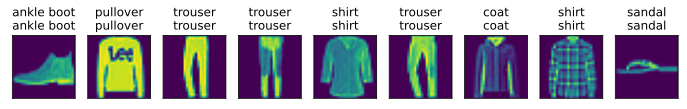

In [7]:
for X, y in test_iter:
    break
true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(np.argmax(net(X).data.numpy(), axis=1))
titles = [truelabel + '\n' + predlabel for truelabel, predlabel in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(X[0:9], titles[0:9])

This looks a bit better than our previous result, a good sign that we’re on the right path.

# Summary

We saw that implementing a simple MLP is easy, even when done manually. That said, with a large number of layers,
this can get messy (e.g. naming and keeping track of the model parameters, etc).

# Exercises

1. Change the value of the hyper-parameter num_hiddens in order to see how this hyperparameter influences your
results.
2. Try adding a new hidden layer to see how it affects the results.
3. How does changing the learning rate change the result.
4. What is the best result you can get by optimizing over all the parameters (learning rate, iterations, number of hidden
layers, number of hidden units per layer)?

# References

[1] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014).  JMLR